## Necessary Imports 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [10]:
df = pd.read_csv('C:\\Users\\Ha\\Desktop\\Projects\\HumCell_Classification_using_SVM\\dataset\\cell_samples.csv' )
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [11]:
df.tail()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [13]:
df.shape

(699, 11)

In [14]:
df.size

7689

In [15]:
df.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [16]:
df['Class'].value_counts()

Class
2    458
4    241
Name: count, dtype: int64

## Distribution of the classes

In [17]:
benign = df[df['Class']==2][0:200]
malignant = df[df['Class']==4][0:200]

<Axes: xlabel='Clump', ylabel='UnifSize'>

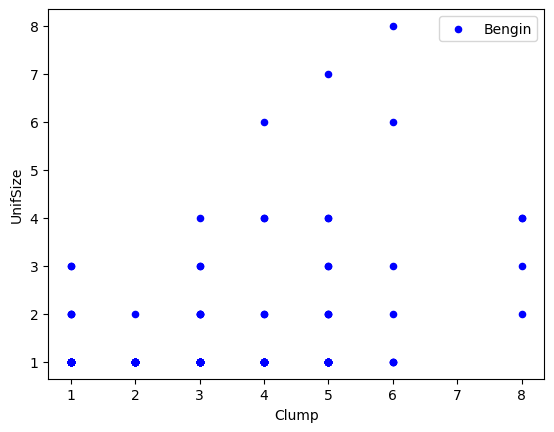

In [19]:
benign.plot(kind='scatter',x ='Clump',y='UnifSize', color='blue', label='Bengin')

<Axes: xlabel='Clump', ylabel='UnifSize'>

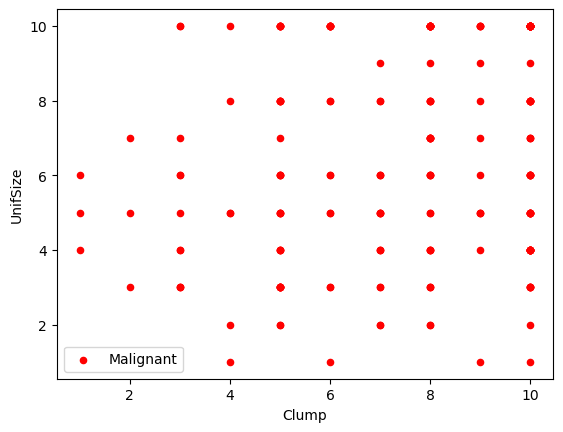

In [21]:
malignant.plot(kind='scatter',x='Clump',y='UnifSize', color='red',label='Malignant')

## Identifying unwanted rows

In [22]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [23]:
df['BareNuc']

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: BareNuc, Length: 699, dtype: object

In [25]:
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

## Remove unwanted columns

In [26]:
df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [29]:
features = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

# Independent variables
X = np.asarray(features)
# Dependent variables
y = np.asarray(df['Class'])
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [33]:
y[0:10]

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2], dtype=int64)

## Divide the data Train/Test

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=4)

In [35]:
x_train.shape

(546, 9)

In [36]:
x_test.shape

(137, 9)

In [37]:
y_train.shape

(546,)

In [38]:
y_test.shape

(137,)

## Modeling (SVM)

In [39]:
from sklearn import svm
classifier = svm.SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(x_train, y_train)
y_predict = classifier.predict(x_test)

## Evaluation

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



In [44]:
cof_matrix = confusion_matrix(y_test,y_predict)
print(cof_matrix)

[[85  5]
 [ 0 47]]


Text(50.722222222222214, 0.5, 'True Labels')

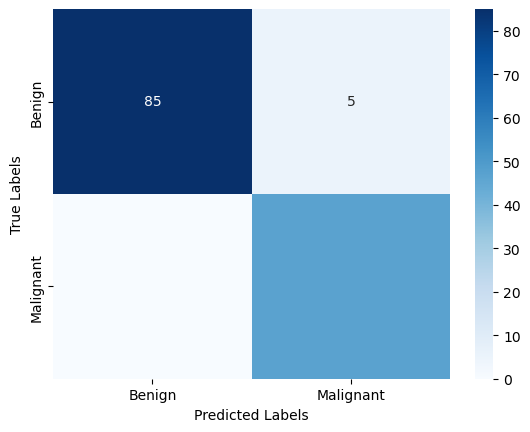

In [45]:
import seaborn as sns
sns.heatmap(cof_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'],yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')